about the dataset:credit card dataset

This dataset is designed to analyze the behavior of credit card users over the last six months. It includes 18 variables, each representing different aspects of the user's activity and credit card usage.


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN




In [3]:
df = pd.read_csv('/content/CC GENERAL.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [8]:
df['MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT']= df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [9]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
df.isnull().sum().sum()

0

In [11]:
df1= df.drop(['CUST_ID'], axis=1)

In [12]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
scaled_df1= MinMaxScaler()
scaled_df1= scaled_df1.fit_transform(df1)


In [14]:
scaled_df2= pd.DataFrame(scaled_df1, columns= df1.columns)

In [15]:
scaled_df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


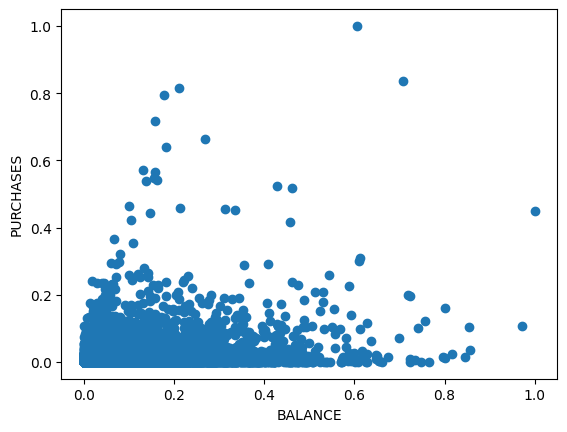

In [16]:
plt.scatter(scaled_df2['BALANCE'], scaled_df2['PURCHASES'])
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

In [17]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_df2)
  wcss.append(kmeans.inertia_)

In [18]:
wcss

[5935.39676100803,
 3508.1506689144694,
 2927.5868574761757,
 2605.287196386715,
 2262.73476841362,
 2060.09029571187,
 1857.9491367656128,
 1761.889370335337,
 1688.8735200779356,
 1501.283654791754]

In [19]:
scaled_wcss= MinMaxScaler()
scaled_wcss= scaled_wcss.fit_transform(pd.DataFrame(wcss))

In [20]:
scaled_wcss

array([[1.        ],
       [0.45259716],
       [0.32166595],
       [0.24897956],
       [0.17172569],
       [0.12602444],
       [0.08043671],
       [0.05877291],
       [0.04230606],
       [0.        ]])

plotting the elbow for checking the k value.

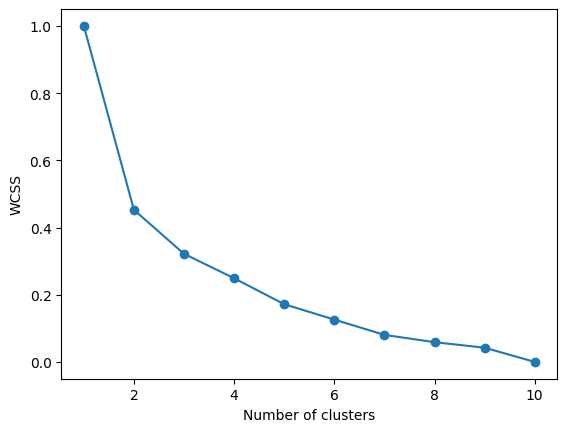

In [21]:
plt.plot(range(1,11), scaled_wcss, marker= 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [22]:
kmeans= KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df2)

KMeans(n_clusters=3, random_state=42)

In [23]:
predict= kmeans.predict(scaled_df2)

In [24]:
predict

array([2, 2, 0, ..., 1, 2, 0], dtype=int32)

In [25]:
predict.shape

(8950,)

In [26]:
scaled_df2['cluster']= predict

In [27]:
scaled_df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,2
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,2
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0,2
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,2


In [28]:
kmeans.cluster_centers_

array([[0.1010818 , 0.97370607, 0.06519944, 0.05871543, 0.03573504,
        0.01397872, 0.89300748, 0.79848575, 0.48096273, 0.06236697,
        0.01899836, 0.11822437, 0.22200658, 0.06370167, 0.01017575,
        0.2708953 , 0.95865096],
       [0.05986139, 0.91410129, 0.02174997, 0.00660158, 0.035474  ,
        0.01067678, 0.87109628, 0.09870284, 0.82012502, 0.04717519,
        0.01407928, 0.0581791 , 0.13010625, 0.02744932, 0.01218754,
        0.23791049, 0.91915378],
       [0.08949323, 0.82615308, 0.00603494, 0.00571242, 0.0028131 ,
        0.02877614, 0.14335778, 0.08152534, 0.06071039, 0.12381944,
        0.0359351 , 0.00748031, 0.13668219, 0.02910745, 0.01114076,
        0.06839084, 0.90785019]])

In [29]:
new_cluster_df1= scaled_df2[scaled_df2['cluster']==0]
new_cluster_df2= scaled_df2[scaled_df2['cluster']==1]
new_cluster_df3= scaled_df2[scaled_df2['cluster']==2]


In [30]:
new_cluster_df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2,0.131026,1.0,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.00,0.000000,0.000000,0.033520,0.248748,0.012264,0.008210,0.0,1.0,0
6,0.032939,1.0,0.144598,0.157076,0.030595,0.000000,1.000000,1.000000,1.00,0.000000,0.000000,0.178771,0.449082,0.125279,0.002592,1.0,1.0,0
21,0.334479,1.0,0.129690,0.144992,0.019996,0.004859,1.000000,0.916667,1.00,0.222222,0.048780,0.256983,0.373957,0.040968,0.021723,0.0,1.0,0
33,0.006599,1.0,0.012985,0.015622,0.000000,0.000000,0.916667,0.916667,0.00,0.000000,0.000000,0.030726,0.038397,0.008349,0.002569,0.3,1.0,0
37,0.212543,1.0,0.048543,0.040288,0.032817,0.036015,0.750000,0.500000,0.75,0.222222,0.056911,0.114525,0.165275,0.031898,0.020170,0.0,1.0,0


In [31]:
new_cluster_df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5,0.095038,1.0,0.027188,0.000000,0.059257,0.0,0.666667,0.000000,0.583333,0.0,0.0,0.022346,0.058431,0.027603,0.031506,0.000000,1.0,1
7,0.095764,1.0,0.008895,0.000000,0.019387,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.033520,0.075125,0.013388,0.006963,0.000000,1.0,1
10,0.067905,1.0,0.018763,0.000000,0.040894,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.033520,0.038397,0.021358,0.028436,0.000000,1.0,1
12,0.079657,1.0,0.065620,0.061338,0.031900,0.0,1.000000,0.250000,0.916667,0.0,0.0,0.072626,0.098497,0.011992,0.006416,0.250000,1.0,1
13,0.048400,1.0,0.043596,0.010303,0.076354,0.0,0.750000,0.166667,0.750000,0.0,0.0,0.072626,0.248748,0.032647,0.003287,0.083333,1.0,1


In [32]:
new_cluster_df3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,2
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,2
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0,2
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,2
8,0.053296,1.000000,0.017567,0.016228,0.008889,0.000000,0.333333,0.083333,0.250000,0.000000,0.00000,0.013966,0.232053,0.013570,0.004083,0.000000,1.0,2


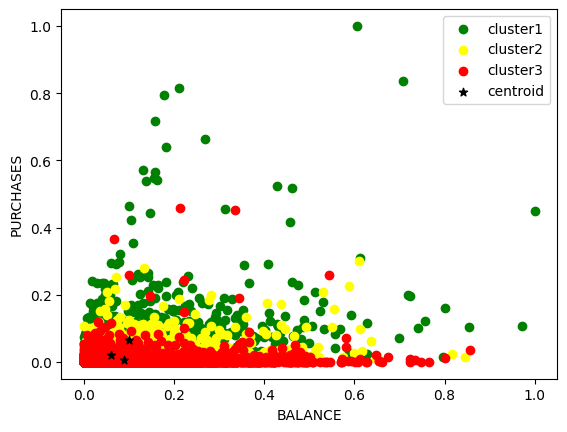

In [33]:
plt.scatter(new_cluster_df1['BALANCE'], new_cluster_df1['PURCHASES'], color='green', label= 'cluster1')
plt.scatter(new_cluster_df2['BALANCE'], new_cluster_df2['PURCHASES'], color='yellow', label= 'cluster2')
plt.scatter(new_cluster_df3['BALANCE'], new_cluster_df3['PURCHASES'], color='red', label= 'cluster3')

plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], color='black', label= 'centroid', marker= '*')
plt.legend()
plt.show()


In [34]:
result=silhouette_score(scaled_df2, predict)

In [35]:
result

0.5332280851675685

DBSCAN

In [83]:
dbscan= DBSCAN(eps=0.5, min_samples=10)

In [86]:
dbscan.fit(scaled_df2)

DBSCAN(min_samples=10)

In [91]:
dbscan_labels = dbscan.labels_

In [92]:
dbscan_labels

array([0, 0, 1, ..., 2, 0, 1])

In [87]:

scaled_df2['DBSCAN_cluster'] = dbscan_labels

n_outliers = list(dbscan_labels).count(-1)
print(f"Number of outliers detected: {n_outliers}")

Number of outliers detected: 68


In [101]:
if len(set(dbscan_labels)) > 1:
    silhouette_avg = silhouette_score(scaled_df2[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Silhouette Score (excluding noise): {silhouette_avg}")
else:
    print("Cannot compute silhouette score, as DBSCAN detected no clusters.")



Silhouette Score (excluding noise): 0.6599904734616131


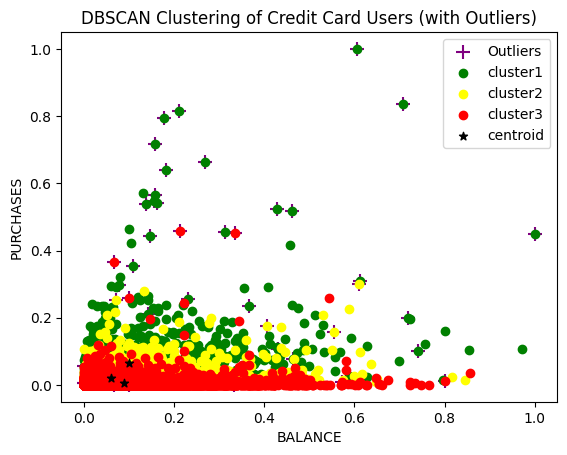

In [102]:
noise_data = scaled_df2[scaled_df2['DBSCAN_cluster'] == -1]
plt.scatter(noise_data['BALANCE'], noise_data['PURCHASES'], c='purple', marker='+', s=100, label='Outliers')
plt.scatter(new_cluster_df1['BALANCE'], new_cluster_df1['PURCHASES'], marker="o",color='green', label= 'cluster1')
plt.scatter(new_cluster_df2['BALANCE'], new_cluster_df2['PURCHASES'], marker="o", color='yellow', label= 'cluster2')
plt.scatter(new_cluster_df3['BALANCE'], new_cluster_df3['PURCHASES'], marker="o", color='red', label= 'cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], color='black', label= 'centroid', marker= '*')
plt.title('DBSCAN Clustering of Credit Card Users (with Outliers)')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()